<a href="https://colab.research.google.com/github/Kasaligan/Machine-Learning-UNS/blob/main/Clase_3_Ejercicio_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El metodo de KNN implementado es el del modulo ***Scikit Learn***, este permite implementar distintos algoritmos: "auto", "ball_tree", "kd_tree" y "brute". Tras buscar un poco, si bien no logro entender del todo como funcionan estos algoritmos, encontre un paper en el cual se concluye que el algoritmo "kd_tree" es mas rapido que "ball_tree" y da mejores resultados. El paper puede verse en el siguiente enlace:

https://arxiv.org/ftp/arxiv/papers/1210/1210.6122.pdf

Por esto se utilizara el algoritmo "kd_tree".

In [ ]:
#Importo los modulos scikit learn y numpy para el procesamiento y pyplot para los graficos
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt


A continuacion construyo los dataset 2D.




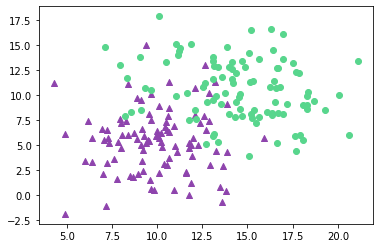

In [ ]:

#A = np.random.normal(10, 3, size=(10000, 2))       #Esta genera dos datasets normales en un array, independientes, no es lo que busco 

#Creo el primer conjunto de datos
centroide_1 = [10,5]
varianza_1_x = 4      #recordar que varianza es cuadrado del desvio estandar, aca seria desvio=2
varianza_1_y = 9      #desvio=3
covarianza_1 = 1      #el factor de correlacion es cov/producto de desvios (no varianzas)
matriz_cov_1 =([varianza_1_x , covarianza_1] , [covarianza_1 , varianza_1_y])
A = np.random.multivariate_normal(centroide_1 , matriz_cov_1 , size=100)

centroide_2 = [15,10]
varianza_2_x = 9      #recordar que varianza es cuadrado del desvio estandar, aca seria desvio=2
varianza_2_y = 9      #desvio=3
covarianza_2 = -3      #el factor de correlacion es cov/producto de desvios (no varianzas)
matriz_cov_2 =([varianza_2_x , covarianza_2] , [covarianza_2 , varianza_2_y])
B = np.random.multivariate_normal(centroide_2 , matriz_cov_2 , size=100)

#Grafico los datos
plt.figure()
plt.scatter(A[:,0],A[:,1],c= "#8e44ad", marker="^")
plt.scatter(B[:,0],B[:,1],c= "#58d68d", marker="o")

Separo los datasets en mitades. La primera mitad de cada dataset entrenara al sistema mientras que las segundas mitades de los datasets seran para comprobar su eficacia. Los datasets no se ordenan para mantener los datos aleatorios y tener una muestra en principio representativa de cada uno en cada mitad. Tambien preparamos las etiquetas (target) que acompañan a los datos

In [ ]:
#Datasets para entrenamiento
A1=A[0:50]          #El vector creado va hasta 49 (limite superior no incluido)
B1=B[0:50]
Training_data = np.concatenate((A1,B1),axis=0)

#Datasets para evaluacion
A2=A[50:100]        #El vector creado va hasta 99 (limite superior no incluido)
B2=B[50:100]
Testing_data = np.concatenate((A2,B2),axis=0)

#Preparo los target
Target_A=["A"]*50
Target_B=["B"]*50
Target = np.concatenate((Target_A,Target_B),axis=0)

print(Training_data)
print(len(Testing_data))
print(len(Target))

[[13.89315375  4.32586828]
 [ 8.36776183 11.1354557 ]
 [ 7.01114685  2.14483805]
 [ 9.09512465  4.97347438]
 [10.23369747  5.26828475]
 [10.45356618  6.76476564]
 [11.98050455  5.68176139]
 [11.5781273   2.22673151]
 [ 7.93063357  7.65106921]
 [ 7.98949258  4.693441  ]
 [ 9.85321136  0.49470825]
 [ 7.228351    3.23024118]
 [ 9.92236802  5.94352059]
 [10.95206056  6.89503177]
 [10.91838215  0.53778132]
 [ 7.2938989   5.69265234]
 [ 8.38413917  5.96890518]
 [ 7.15001653 -1.11348432]
 [10.52889001  3.04133509]
 [ 7.23798802  6.52775986]
 [10.63867152  8.74415383]
 [ 7.34513221  5.23481638]
 [ 9.22421353  4.54770354]
 [ 7.80158263  1.59285333]
 [10.98337589  4.9530022 ]
 [15.90991872  5.70746295]
 [ 8.88873064  9.71088525]
 [12.70380432  6.49243866]
 [13.62648148  2.90816586]
 [10.68245848  6.27038154]
 [ 9.25203653  5.92200395]
 [11.9083273   3.90269301]
 [ 8.01511114  7.16341375]
 [ 4.90077214  6.06105866]
 [ 9.22260259  2.37662509]
 [ 9.67448596 10.10745169]
 [11.88119205  5.00333979]
 

A continuacion preparo el clasificador KNN.

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=10,algorithm="kd_tree")
KNN.fit(Training_data,Target)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Testeo el clasificador KNN. Aun asi, esta es la unica medida que puedo obtener directamente asi que guardare las predicciones para cada valor de testeo y calculare precision, exactitud y f-measure manualmente. 

In [ ]:
exactitud = KNN.score(Testing_data,Target)
print(exactitud)

0.86


Implemento el bucle para calcular los valores TP, TN, FP y FN.

In [ ]:
TP=0
TN=0
FP=0
FN=0

#Evaluo el clasificador binario respecto a "A", pues el que es respecto a "B" por tener solo dos clases es el reciproco.

for i in range(0,100):
  if (KNN.predict([Testing_data[i]])==Target[i]=="A"):    #Comparo la etiqueta predicha con la real y en base a eso asigno los parametros
    TP=TP+1
  elif (KNN.predict([Testing_data[i]])==Target[i]=="B"):
    TN=TN+1
  elif (KNN.predict([Testing_data[i]])!=Target[i]=="A"):
    FN=FN+1
  elif (KNN.predict([Testing_data[i]])!=Target[i]=="B"):
    FP=FP+1

#print(KNN.predict([Testing_data[0,:]]))    para ver la prediccion de un solo valor
#print(KNN.predict_proba(Testing_data))     para ver la probabilidad de cada prediccion

print(TP)
print(TN)
print(FP)
print(FN)


44
42
8
6


Finalmete evaluo los parametros deseados.

In [ ]:
exact = (TP+TN)/(TP+TN+FP+FN)
prec =  TP/(TP+FP)
f_m = TP/(TP+0.5*(FP+FN))
print("Exactitud: ",exact,"\nPrecision: ",prec,"\nF-measure: ",f_m)

Exactitud:  0.86 
Precision:  0.8461538461538461 
F-measure:  0.8627450980392157


**Conclusiones

Tras jugar con los parametros de las distribuciones observo lo siguiente:

1. Al acercar los valores de las medias la calidad del clasificador se deteriora, cosa que es de esperarse ya que las nubes de puntos empiezan a estar cada vez mas superpuestas.
2. Algo similar a lo anterior sucede cuando se aumentan las desviaciones lo suficiente como para que empiecen a interaccionar los dos conjuntos. 
3. Al jugar con la cantidad de puntos que evalua el KNN, veo que 10 es un valor "lindo". Con pocos puntos evaluados se deteriora la performance, al igual que cuando se elige evaluar un numero elevado de puntos.